Ahora en la etapa del EDA o Analisis exploratorio de datos veremos como estan relacionados los datos numericos, tales como el puntaje o la popularidad, veremos tambien las longitudes de las peliculas.

In [1]:
#importamos librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#leemos el dataframe ya tratado
df = pd.read_csv('data/movies_etl.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head(2)

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,directores,release_year,return
0,Toy Story Collection,30000000.0,"['Animation', 'Comedy', 'Family']",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,['Pixar Animation Studios'],['United States of America'],1995-10-30,373554033.0,81.0,['English'],Toy Story,7.7,5415.0,['John Lasseter'],1995,1145.18011
1,no_collection,65000000.0,"['Adventure', 'Fantasy', 'Family']",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"['TriStar Pictures', 'Teitler Film', 'Intersco...",['United States of America'],1995-12-15,262797249.0,104.0,"['English', 'Français']",Jumanji,6.9,2413.0,['Joe Johnston'],1995,304.30346


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42196 entries, 0 to 42195
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  39170 non-null  object 
 1   budget                 42196 non-null  float64
 2   genres                 39170 non-null  object 
 3   id                     42196 non-null  int64  
 4   original_language      42196 non-null  object 
 5   overview               41294 non-null  object 
 6   popularity             42196 non-null  float64
 7   production_companies   42196 non-null  object 
 8   production_countries   42196 non-null  object 
 9   release_date           42196 non-null  object 
 10  revenue                42196 non-null  float64
 11  runtime                42196 non-null  float64
 12  spoken_languages       42196 non-null  object 
 13  title                  42196 non-null  object 
 14  vote_average           42196 non-null  float64
 15  vo

In [4]:
df.columns

Index(['belongs_to_collection', 'budget', 'genres', 'id', 'original_language',
       'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'title', 'vote_average', 'vote_count', 'directores',
       'release_year', 'return'],
      dtype='object')

Nos dejemos solo los valores numericos de las columnas en este momento para encontrar relaciones.

In [5]:
df_reducido = df[['budget', 
        'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count', 'return', 'title', 'overview']]

In [6]:
print(len(df[df['budget'] == 0]))
print(len(df[df['return'] == 0]))
print(len(df[df['revenue'] == 0]))

33940
33960
35253


Podemos observar que la cantidad de valores 'nulos' o ceros en estas 3 columnas son demasiado por lo que las evitaremos en nuestro analisis.

In [7]:
df_reducido.drop(columns=['budget', 'return', 'revenue'], inplace=True)

C:\Users\niko\AppData\Local\Temp\ipykernel_15372\50445418.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reducido.drop(columns=['budget', 'return', 'revenue'], inplace=True)


In [8]:
df_reducido.describe()

,popularity,runtime,vote_average,vote_count
count,42196.000000,42196.000000,42196.000000,42196.000000
mean,2.914097,93.852987,5.631261,109.391720
std,5.744661,37.578123,1.921395,489.341742
min,0.000000,0.000000,0.000000,0.000000
25%,0.387424,85.000000,5.000000,3.000000
50%,1.136089,95.000000,6.000000,10.000000
75%,3.717885,106.000000,6.800000,35.000000
max,547.488298,1256.000000,10.000000,14075.000000


Observamos que los valores minimos destacan los 0 que serian practicamente nulos, veamos un poco mas alla.

In [9]:
print(df_reducido.popularity.value_counts().sort_values(ascending=False).head(5))
df_reducido.runtime.replace(0.0, df_reducido.runtime.mean(), inplace=True)
print(df_reducido.runtime.value_counts().sort_values(ascending=False).head(5))
print(df_reducido.vote_average.value_counts().sort_values(ascending=False).head(5))
print(df_reducido.vote_count.value_counts().sort_values(ascending=False).head(5))

popularity
0.000001    53
0.000308    40
0.000000    40
0.000844    37
0.000220    37
Name: count, dtype: int64
runtime
90.000000     2348
93.852987     1460
100.000000    1343
95.000000     1289
93.000000     1124
Name: count, dtype: int64
vote_average
0.0    2756
6.0    2281
5.0    1834
7.0    1744
6.5    1603
Name: count, dtype: int64
vote_count
1.0    3008
2.0    2885
0.0    2667
3.0    2576
4.0    2277
Name: count, dtype: int64


C:\Users\niko\AppData\Local\Temp\ipykernel_15372\2881834900.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reducido.runtime.replace(0.0, df_reducido.runtime.mean(), inplace=True)


In [10]:
print(f'promedio popularity: {df_reducido.popularity.mean()}')
print(f'promedio runtime: {df_reducido.runtime.mean()}')
print(f'promedio vote_average: {df_reducido.vote_average.mean()}')
print(f'promedio vote_count: {df_reducido.vote_count.mean()}')

promedio popularity: 2.9140973274480992
promedio runtime: 97.10034113209677
promedio vote_average: 5.631261256991183
promedio vote_count: 109.39171959427433


In [11]:
df_votes = df_reducido[['title', 'vote_average','vote_count', 'overview']]
df_votes.describe()

,vote_average,vote_count
count,42196.000000,42196.000000
mean,5.631261,109.391720
std,1.921395,489.341742
min,0.000000,0.000000
25%,5.000000,3.000000
50%,6.000000,10.000000
75%,6.800000,35.000000
max,10.000000,14075.000000


In [12]:
df_votes = df_votes[df_votes['vote_average'] != 0]
df_votes = df_votes[df_votes['vote_count'] != 0]

In [13]:
df_votes.shape

(39440, 4)

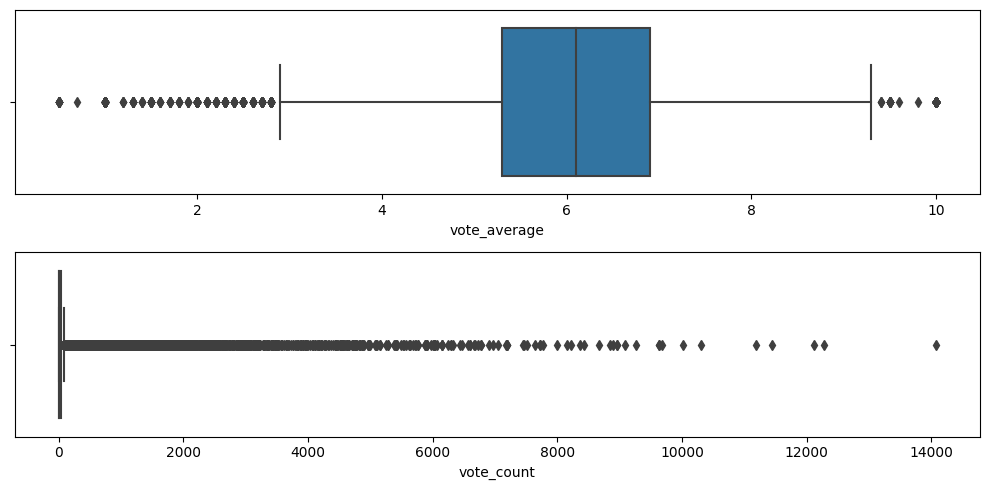

In [14]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 5))
sns.boxplot(x=df_votes['vote_average'], ax=axs[0])
sns.boxplot(x=df_votes['vote_count'], ax=axs[1])

plt.tight_layout()
plt.show()

Podemos ver que estan muy borrosos nuestros datos, tratemos un poco estos excesos.

por lo que pondremos un umbral a las peliculas con mas de 500 votos para dar fe de que el promedio de votacion sera real.

In [15]:
df_votes['vote_count'] = df_votes['vote_count'].apply(lambda x: x if x > 300 else None)
df_votes = df_votes.dropna()
df_votes.shape

(2798, 4)

Wow, tan solo 2798 peliculas fueron votadas por mas de 300 personas.

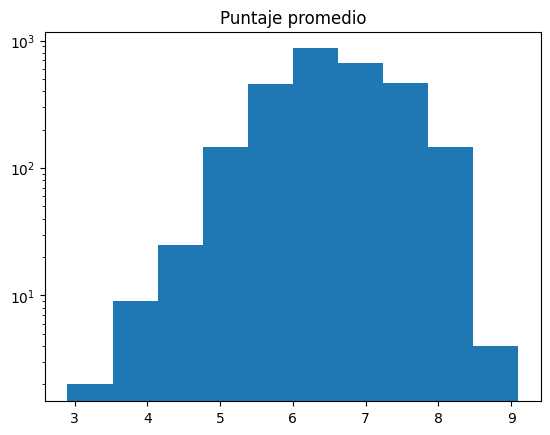

In [16]:
plt.hist(df_votes['vote_average'], log= True)
plt.title('Puntaje promedio')
plt.show()

Podemos observar que la mayoria de los votos se establecen entre un puntaje de 5 y 8

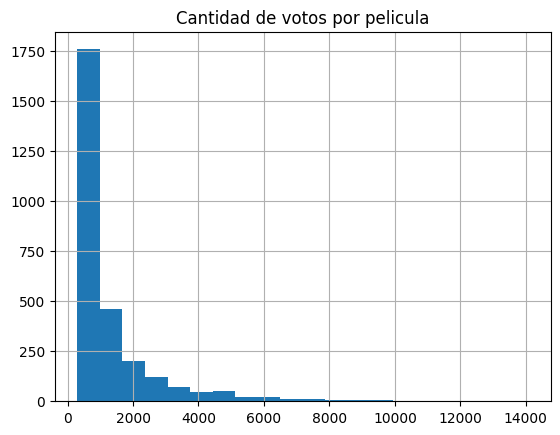

In [17]:
df_votes['vote_count'].hist(bins=20)
plt.title('Cantidad de votos por pelicula')
plt.show()

Tambien vemos que la gran mayoria de las peliculas poseen menos de 2000 votos, por lo que la distribucion esta muy sesgada a la izquierda.

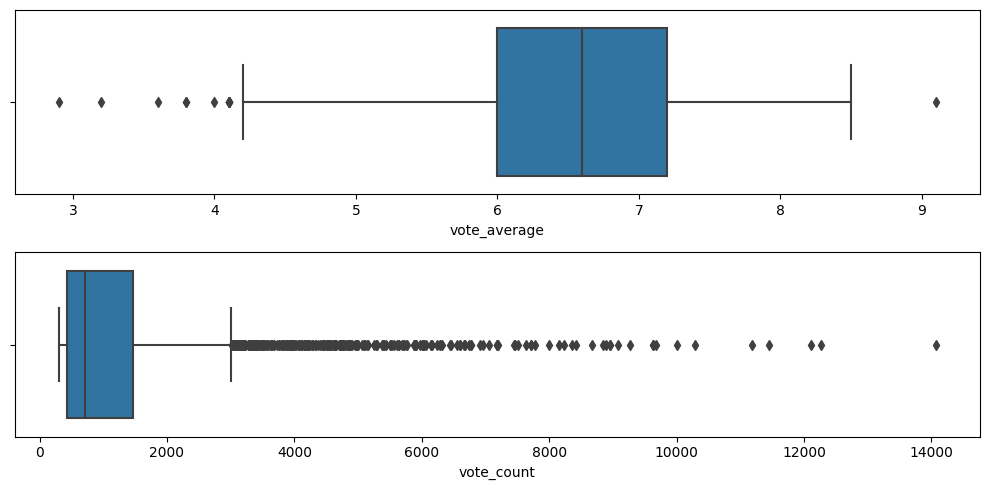

In [18]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 5))
sns.boxplot(x=df_votes['vote_average'], ax=axs[0])
sns.boxplot(x=df_votes['vote_count'], ax=axs[1])

plt.tight_layout()
plt.show()

Ahora nuestros datos estan un poco mas legibles pero el sistema sigue tomando como outlayers, veamos si podemos encontrar algo que justifique a las 10 peliculas con mas votos. las grafiquemos.

In [19]:
#busquemos las peliculas con mayor relacion puntaje voto.
df_votes = df_votes.sort_values(by=['vote_average', 'vote_count'], ascending=False)
print(f'pelicula con mas votos y puntaje: {df_votes.iloc[0, 0]}')
print(f'pelicula con menos votos y puntaje: {df_votes.iloc[-1, 0]}')

pelicula con mas votos y puntaje: Dilwale Dulhania Le Jayenge
pelicula con menos votos y puntaje: Dragonball Evolution


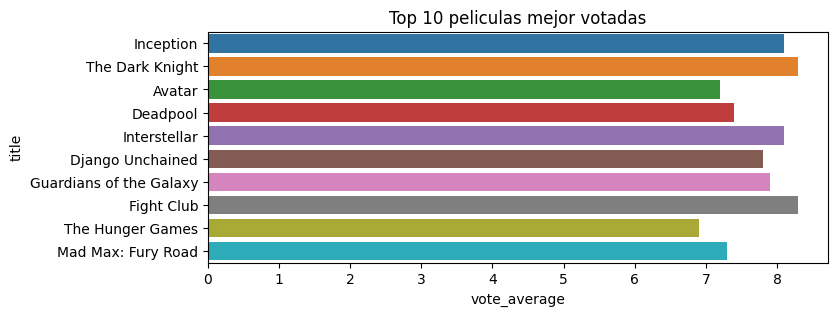

In [20]:
top_10 = df_votes.sort_values(by=['vote_count'], ascending=False).head(10)
fig = plt.figure(figsize=(8, 3))
sns.barplot(data=top_10, y='title', x='vote_average')
plt.title('Top 10 peliculas mejor votadas')
plt.show()

Podemos ver que efectivamente las 10 peliculas mas votadas han sido un hito en su momento por lo que no deberia resultarnos como un outlier.

Ya entendiendo un poco mejor los datos del dataframe podremos crear el sistema de recomendacion, nos centraremos en hacer un sistema simple que recomiende las peliculas con mas de 300 votos de este dataset junto a un proceso de lenguaje natural para buscar la descripcion de las peliculas parecidas y asi poder recomendar las mismas.

In [21]:
df_votes.to_csv('data/movies_ml.csv')